In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import csv

In [7]:
dataset_path = "../../training.1600000.processed.noemoticon.csv"
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv(dataset_path, encoding= DATASET_ENCODING, names=DATASET_COLUMNS)
df.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.tail(5)

,target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [9]:
df["target"].unique()

array([0, 4])

In [10]:
#https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis/data#Twitter-Sentiment-Analysis
dataset_path2 = "../data/testdata.manual.2009.06.14.csv"
DATASET_COLUMNS2 = ["target", "ids", "date", "flag", "user", "text"]
df2 = pd.read_csv(dataset_path2, encoding=DATASET_ENCODING , names=DATASET_COLUMNS2)
df3 = df2[df2['target']==2]
df3.head(5)

,target,ids,date,flag,user,text
10,2,13,Mon May 11 03:32:42 UTC 2009,obama,jpeb,Check this video out -- President Obama at the...
30,2,50,Thu May 14 05:25:04 UTC 2009,40d,hiteshbagai,need suggestions for a good IR filter for my c...
31,2,117,Sat May 16 16:18:36 UTC 2009,google,Annimallover,@surfit: I just checked my google for my busin...
45,2,136,Sun May 17 17:30:19 UTC 2009,san francisco,sulu34,is in San Francisco at Bay to Breakers.
46,2,137,Sun May 17 17:30:23 UTC 2009,san francisco,schuyler,just landed at San Francisco


In [11]:
with open("../data/processedPositive.csv") as productivityCost:
    csv_reader = csv.reader(productivityCost, delimiter=',')
    rows = []
    for row in csv_reader:
        rows = row
posTweets = pd.DataFrame(data=rows,columns=["text"])
#posTweets = posTweets.drop([:10,:],inplace=True) # drop first n rows
posTweets['target'] = 4
positiveTweets = posTweets.iloc[:1186]

In [12]:
with open("../data/processedNeutral.csv") as processedNeutral:
    csv_reader = csv.reader(processedNeutral, delimiter=',')
    #print(readPC[0])
    rows = []
    for row in csv_reader:
        rows = row
neutralTweets = pd.DataFrame(data=rows,columns=["text"])
neutralTweets['target'] = 2
neutralTweets = neutralTweets.iloc[:1186]

In [13]:
#only do once in run
df = df.drop(["ids","date","flag","user"],axis=1)
df3 = df3.drop(["ids","date","flag","user"],axis=1)

In [14]:
print(df.shape)
print(df3.shape)
print(posTweets.shape)
print(neutralTweets.shape)

(1600000, 2)
(139, 2)
(1186, 2)
(1186, 2)


### Load negative words 
source: Negative words from Liu 

In [15]:
negativeWords = [line.rstrip('\n') for line in open('negative-words.txt')]
patternNg = '|'.join([word for word in negativeWords])
patternNg = patternNg.replace("-","") # eventually replace - and * 
patternNg = patternNg.replace("*","")
patternNg

'2faced|2faces|abnormal|abolish|abominable|abominably|abominate|abomination|abort|aborted|aborts|abrade|abrasive|abrupt|abruptly|abscond|absence|absentminded|absentee|absurd|absurdity|absurdly|absurdness|abuse|abused|abuses|abusive|abysmal|abysmally|abyss|accidental|accost|accursed|accusation|accusations|accuse|accuses|accusing|accusingly|acerbate|acerbic|acerbically|ache|ached|aches|achey|aching|acrid|acridly|acridness|acrimonious|acrimoniously|acrimony|adamant|adamantly|addict|addicted|addicting|addicts|admonish|admonisher|admonishingly|admonishment|admonition|adulterate|adulterated|adulteration|adulterier|adversarial|adversary|adverse|adversity|afflict|affliction|afflictive|affront|afraid|aggravate|aggravating|aggravation|aggression|aggressive|aggressiveness|aggressor|aggrieve|aggrieved|aggrivation|aghast|agonies|agonize|agonizing|agonizingly|agony|aground|ail|ailing|ailment|aimless|alarm|alarmed|alarming|alarmingly|alienate|alienated|alienation|allegation|allegations|allege|allergi

In [16]:
patternTechno = "handy|Firefox|Opera|Siri|Alexa|Pixel|smarthome|smartwatch|internet|web|programm|handy|smartphone|phone|mobilephone|PC|email|Coftware|Computer|SAP|Apple|Google|Samsung|Blackberry|HTC"
patternWork = "work|labour|grind|job|business|occupation|position|profession"

In [17]:
pat1 = patternWork.split("|")
pat2 = patternTechno.split("|")
pat3 = patternNg.split("|")
dic1 = pd.DataFrame(data={"workPattern":pat1})
dic2 = pd.DataFrame(data={"technoPattern":pat2})
dic3 = pd.DataFrame(data={"ngPattern":pat3})
dic11 = dic1.T
dic22 = dic2.T
dic33 = dic3.T
#dic4 = dic22.merge(dic11, left_on=['A','B'], right_on=['A','D'], how='left')

In [18]:
merged = dic22.combine_first(dic11)
merged = dic33.combine_first(merged)
merged

,0,1,2,3,4,5,6,7,8,9,...,4773,4774,4775,4776,4777,4778,4779,4780,4781,4782
ngPattern,2faced,2faces,abnormal,abolish,abominable,abominably,abominate,abomination,abort,aborted,...,wrongly,wrought,yawn,zap,zapped,zaps,zealot,zealous,zealously,zombie
technoPattern,handy,Firefox,Opera,Siri,Alexa,Pixel,smarthome,smartwatch,internet,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workPattern,work,labour,grind,job,business,occupation,position,profession,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dflatex2 = merged.iloc[[0,1,2], [0,1,2,3]]
dflatex2
#print(dflatex2.to_latex())

,0,1,2,3
ngPattern,2faced,2faces,abnormal,abolish
technoPattern,handy,Firefox,Opera,Siri
workPattern,work,labour,grind,job


In [20]:
#print(dflatex2.head(5).to_latex())

In [21]:
#careful, this can take up to ~50 min to complition
import time
start = time.time()
stress = df[df['text'].str.contains(patternNg)&
             df['text'].str.contains(patternTechno)&
             df['text'].str.contains(patternWork)]
end = time.time()
print(end - start)
stress.head(5)

1632.754525899887


,target,text
65,0,@Starrbby too bad I won't be around I lost my ...
304,0,amazon s3 plugin not worked in my website . it...
686,0,The Hoyts Distribution NZ website isn't workin...
1025,0,dang won't be able to get to any workshops run...
2394,0,Tried to install a Twitter-application on my p...


In [22]:
stress.shape

(2439, 2)

In [23]:
#Get 1186 technostress tweets
tsTweets = stress.iloc[:1186]

In [24]:
mixed = pd.concat([tsTweets,neutralTweets,positiveTweets],sort=True)  

In [25]:
mixed.count()

target    3558
text      3558
dtype: int64

In [26]:
mixed.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
0       1186   1183  I am trying to figure out m.slander.net...Twit...    2
2       1186   1126                         and more. Also in epaper.    38
4       1186   1002  Thanks for the recent follow Happy to connect ...   34

### Clean up the data

In [27]:
#replace & with and
mixed['text'] = np.where(mixed['text'].str.contains("&amp;"),mixed['text'].str.replace('&amp;','and'),mixed['text'])
#replace " with Null
mixed['text'] = np.where(mixed['text'].str.contains("&quot;"),mixed['text'].str.replace('&quot;',''),mixed['text'])
#mixed['text'] = np.where(mixed['text'].str.contains("www"),mixed['text'].str.replace('&quot;',''),mixed['text'])

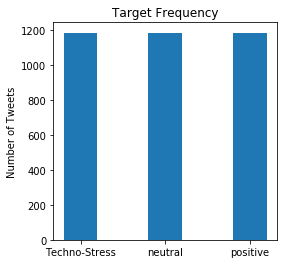

In [28]:
#remove http/s
target_cnt = Counter(mixed.target)
plt.figure(figsize=(4,4))
plt.title("Target Frequency") 
plt.ylabel("Number of Tweets") 
LABELS = ["Techno-Stress", "neutral", "positive"]
plt.xticks([0,2,4], LABELS)
plt.bar(target_cnt.keys(), target_cnt.values(),align='center')
plt.show()

In [29]:
mixed.tail(5)

,target,text
1181,4,Thanks for the recent follow Happy to connect ...
1182,4,- top engaged members this week happy
1183,4,ngam to weeks left for cadet pilot exam cryin...
1184,4,Great! You're welcome Josh happy ^Adam
1185,4,Sixth spot not applicable Team! Higher pa! :)K...


### Save the data to CSV

In [30]:
#check for null values in data
print(pd.isna(mixed).all())

target    False
text      False
dtype: bool


### Plot the word frequency

In [31]:
mixed["target"].value_counts()

4    1186
2    1186
0    1186
Name: target, dtype: int64

In [32]:
mixed.to_csv("../data/mixed_data_1200_dups_incl.csv", sep=';')

In [34]:
duf = mixed.drop_duplicates(subset=['text'], keep="first")
duf.shape

(3310, 2)

In [35]:
#converts whitespaces
trb_nan_idx = duf[pd.isnull(duf['text'])].index.tolist()
duf.loc[trb_nan_idx, 'text'] = ' '
duf.head(5)

/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,target,text
65,0,@Starrbby too bad I won't be around I lost my ...
304,0,amazon s3 plugin not worked in my website . it...
686,0,The Hoyts Distribution NZ website isn't workin...
1025,0,dang won't be able to get to any workshops run...
2394,0,Tried to install a Twitter-application on my p...


In [36]:
#save the extracted data into a csv file // does not overwrite
duf.to_csv("../data/mixed_data_1200.csv", sep=';')

In [37]:
duf["target"].value_counts()

0    1183
2    1126
4    1001
Name: target, dtype: int64

In [38]:
#check the frequence of tweets, one means no dupplicates
max(duf["text"].value_counts())

1

In [39]:
X_load = duf["text"]
Y_load = duf["target"]

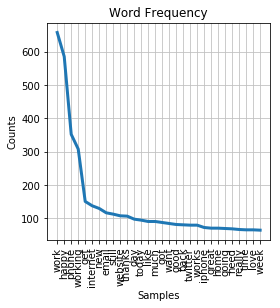

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

stop_eng = stopwords.words('english')

tokens = []
sentences = []
for txt in X_load.values:
    sentences.append(str(txt).lower())
    tokens.extend([str(t).lower().strip(":,.!?") for t in str(txt).split()])

hashtags = [w for w in tokens if w.startswith('#')]
mentions = [w for w in tokens if w.startswith('@')]
links = [w for w in tokens if w.startswith('http') or w.startswith('www')]
filtered_tokens = [w for w in tokens \
                   if not w in stop_eng \
                   and w.isalpha() \
                   and not len(w)<3 \
                   and not w in hashtags \
                   and not w in links \
                   and not w in mentions]
freq_dist = nltk.FreqDist(filtered_tokens)
plt.figure(figsize=(4, 4))
freq_dist.plot(30,cumulative=False,title='Word Frequency',linewidth=3)